<a href="https://colab.research.google.com/github/FilipeSacchetto/Notebooks/blob/main/techincal_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Python packages 
import pandas as pd
from google.colab import drive

**Task 1. Working with data**

[movie_metadata.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/fb728421-b488-45ef-9d84-61f73a1f57e5/movie_metadata.csv)

To complete this task, use the data set in the attached file. Indicate the answer to each of the following steps and time to complete the entire task.

1.1. Download the data set `movie_metadata.csv`, which contains data about films from IMDb (Internet Movie Database).

1.2. The `duration` column contains data on the film length. How many missing values are there in this column?

1.3. Replace the missing values in the `duration` column with the median value for this column.

1.4. What is the average film length? Give the answer as a floating-point figure rounded to two decimal places.

1.5. How many films between 90 minutes and two hours long were released in 2008?

1.6. The `budget` column contains the film's budget. What is the median budget for all the films listed? Give the answer as an integer.

In [4]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/movie_metadata.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here in the question 1.2 is asked to find how many missing values are in the column duration.

To do so, we are going to use pandas package for this. In pure python it's possible to do by dictionary, although that is a big work around. Therefore a simpler solution with pandas is better for a day-a-day working basis.

In [8]:
# pd.DataFrame.columns can show us all the columns names
# and here qe can see the column needed for the question (duration)
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
# in pandas there a many ways to solve the same problema. 
# you can approach this as dots, like I did bellow or
# you can go by list - df['duration'].isnull().sum()
df.duration.isnull().sum()

15

In [24]:
# to double check if we are right we can use pd.DataFrame.info()
# this can guive us a bunch of data, including number of non-nulls.
df.info()
# doing the math: 
# we have 5043 total registers in the hole table
# and 5028 total duration 
print(f'Number of nulls in description {5043 - 5028}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

So, we prove that the number of nulls were correct

Now we're gonna replace the nulls for this column mean value. To do so, we need to use another pandas function. This time assiciate .mean() at the end of df.column_name alongside the function fillna().

In [25]:
# here is set the column that we need thoses NaN to be filled and inside
# the function expects some value.
df.duration.fillna(df.duration.mean())

0       178.000000
1       169.000000
2       148.000000
3       164.000000
4       107.201074
           ...    
5038     87.000000
5039     43.000000
5040     76.000000
5041    100.000000
5042     90.000000
Name: duration, Length: 5043, dtype: float64

Done, now you can see that this column has its nan filled with mean() value. This approach is sometimes not the best because without plotting a boxplot - or doing something that shows outlyers - we can't be sure how many outlyers has in this dataset. That said, we can't be sure if this was the best approach. But, I'll attain to what is asked.
Now I can save this duration without NaN in other column - I highly recommend - or overwrite the column with the values.

In [30]:
# to be more clinical with an analysis I'll be saving this duration
# without NaN's in a new collumn called duration_no_nan
df['duration_no_nan'] = df.duration.fillna(df.duration.mean())

In [31]:
# now we can see that I added a new column to the dataframe
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'duration_no_nan'],
      dtype='object')

In [33]:
# we can check if this columns has nan's
df.duration_no_nan.isnull().sum()

0

Now we have what was asked. A duration column with its NaN's replaced by mean value.

In [39]:
# here lies the average of a film lengh.
# The result was 107.20 but in python the 0 is excluded in a float if it 
# comes at the end.
# To prove that I'll print with a round by 3 decimal after the dot.
print(round(df.duration_no_nan.mean(), 2))
print(round(df.duration_no_nan.mean(), 3))

107.2
107.201


In question number 1.5 is asked:  
"How many films between 90 minutes and two hours long were released in 2008?"

While checking these two columns it appeared that some years are missing. To treat this case is best to convert this nan's as 0 or to accept this nan existence. As we are not building this dataframe for a future ML model I'll stick with the NaN's.

In [41]:
df[['duration_no_nan','title_year']]

,duration_no_nan,title_year
0,178.000000,2009.0
1,169.000000,2007.0
2,148.000000,2015.0
3,164.000000,2012.0
4,107.201074,NaN
...,...,...
5038,87.000000,2013.0
5039,43.000000,NaN
5040,76.000000,2013.0
5041,100.000000,2012.0


In [42]:
# to play safe while working with a dataframe I always creat copys,
# that help me to preserve the original data, maintain it organized, and
# if needed I can join this copys.
df_duration_per_year = df[['duration_no_nan','title_year']]

In [43]:
# now lets do what was asked.
# for this point we'll continue with pandas, it has all resourse we need.
df_duration_per_year.loc[
    (df_duration_per_year['duration_no_nan'] > 90) &
    (df_duration_per_year['duration_no_nan'] < 120) &
    (df_duration_per_year['title_year'] == 2008.0)
    ]

,duration_no_nan,title_year
12,106.0,2008.0
58,98.0,2008.0
72,112.0,2008.0
116,102.0,2008.0
131,96.0,2008.0
...,...,...
4665,95.0,2008.0
4684,99.0,2008.0
4804,101.0,2008.0
4874,93.0,2008.0


As you can see we have done part of the task. Pandas printed for us a dataframe with the conditions that we asked for. Even show us how many at the end of the table. However, if we want to comple this task with finesse we must do a final addition to our code.

In [46]:
# we must add count() at the end
df_duration_per_year.loc[
    (df_duration_per_year['duration_no_nan'] > 90) &
    (df_duration_per_year['duration_no_nan'] < 120) &
    (df_duration_per_year['title_year'] == 2008.0)
    ].count()

duration_no_nan    144
title_year         144
dtype: int64

In [55]:
# we are going to get the median of all bugedts by integer.
df.budget
# but first for this to work we must remove this $ from the string. 


0       237000000.0$
1       300000000.0$
2       245000000.0$
3       250000000.0$
4               0.0$
            ...     
5038            0.0$
5039            0.0$
5040         1400.0$
5041            0.0$
5042         1100.0$
Name: budget, Length: 5043, dtype: object

In [59]:
# now that we remove the characther we can replace the type string by integer.
# Although, as a good practice we are going to save this in a new variable.
df_budget_to_int = df.budget.str.replace("$", "", regex=True)
df.budget.str.replace("$", "", regex=True)

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4               0.0
           ...     
5038            0.0
5039            0.0
5040         1400.0
5041            0.0
5042         1100.0
Name: budget, Length: 5043, dtype: object

In [62]:
# now to finish the exercise we must first convert to float
# because the value in on base 10 and than convert to int.
int(df_budget_to_int.astype(float).median())

15000000

How would you answer the student's question below? Your task is to get your message across in such a way that a beginner can understand your explanation. You can do this any way you want (pictures, GIFs, metaphors, anything) so long as it makes your explanation clear. Indicate how much time you spent completing this task.

> **What is the difference between DataFrame and Series?**
>

To answer this question, we can think a Dataframe as a 2 dimension made of multiple Series that is 1 dimension.
Series can only contain a single list with index. To summarize this with an example. In pandas when you call a column in your dataframe df.comlumn_name this calling will be a Series. 

In [63]:
# to prove the example
print(type(df))
print(type(df.budget))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


You are given two random variables X and Y.

E(X) = 0.5, Var(X) = 2

E(Y) = 7, Var(Y) = 3.5

cov (X, Y) = -0.8

Find the variance of the random variable Z = 2X - 3Y


Based on the cov under 1, we can infere that this variables are correlated. Doing so, we need to imply the variation formula for correlate variables. 
That implys the value of x and y need to be squared and the Cov(X,Y) must be the 4Var(X)+ 9Var(Y) - 2 x 2 x 3Cov(X,Y).  
Var(Z) = 4V(x) + 9V(y) - 12 Cov(X,Y)
Now we only need to substitute the values

In [65]:
var_z = 4 * 2 + 9 * 3.5 + 12 * -0.8

In [66]:
print(var_z)

29.9


Omer trained a linear regression model and tested its performance on a test sample of 500 objects. On 400 of those, the model returned a prediction higher than expected by 0.5, and on the remaining 100, the model returned a prediction lower than expected by 0.7.

What is the MSE for his model?

Limor claims that the linear regression model wasn't trained correctly, and we can do improve it by changing all the answers by a constant value. What will be her MSE?

You can assume that Limor found the smallest error under her constraints.

**Return two values - Omer's and Limor's MSE.**

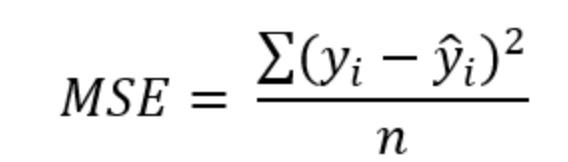
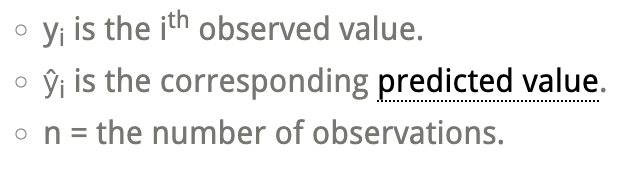

In [70]:
mse_omer = (400 * 0.5 ** 2  + 100 * 0.7 ** 2) / 500
print(mse_omer)

0.298


To find limor constant value

100 * (0.7 - x) = 400 * (0.5 + x)

70 - 100x = 200 + 400x

-500X = 130
x = -1*(130/500)


In [102]:
x = -1*(130/500)
print(x)

-0.26


In [103]:
-0.7 -0.26 

-0.96

In [104]:
0.5 -0.26

0.24

In [98]:
mse_limor = (400* 0.24 **2 + 100*0.96**2)/500

In [100]:
print(mse_limor)

0.23039999999999997
